# Prediction of Diabetes Patient Using Machine Learning (Linear Regression) Project

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [11]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df['target'] = diabetes.target

In [12]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### Split the data into target and features

In [13]:
X = df.drop('target', axis=1)

In [14]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [15]:
X.shape

(442, 10)

### Target

In [17]:
y = df['target']
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [18]:
y.shape

(442,)

### Training the target and the feature

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [85]:
print('Training Set Shape: {} {}'.format(X_train.shape, y_train.shape))
print('Testing Set Shape: {} {}'.format(X_test.shape, y_test.shape))

Training Set Shape: (309, 10) (309,)
Testing Set Shape: (133, 10) (133,)


### Create Linear Regression Model

In [86]:
lr = LinearRegression()
lr

LinearRegression()

### Train the model on the training set

This is the way the model learn

In [87]:
lr.fit(X_train, y_train)

LinearRegression()

### Predict on the testing set

* y_predict is the predicted values of the target variable based on the features
* Then when y_predicts are gotten, we compare them to the original values of the target variable and use it to evaluate the performance of the model

In [88]:
y_predict = lr.predict(X_test)
y_predict.shape

(133,)

### Evaluate the performance of the model

In [89]:
df['target'].mean()

152.13348416289594

* R2: Variance of target variable explained by features, how well the model fits the data, higher R2 is better.
* MAE: Average absolute distance between the predicted values and original values. Lower value for MAE is better
* RMSE: Average squared distance between the predicted values and original values. Lower value for RMSE is better
* Intercept: is the starting point of the regression line on he y-axis. 
* Intercept: it is the alue of target variable when the feature variables are zero.
* Intercept: If positive number, both target and features are increase
* Intercept: If negative number, both target and features are decrease

In [90]:
R2 = r2_score(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
MSE = mean_squared_error(y_test, y_predict)
intercept = lr.intercept_
coeff = lr.coef_

In [91]:
print('R2 Score: {}'.format(R2))
print('Mean Absolute Error: {}'.format(MAE))
print('Mean Squared Error: {}'.format(MSE))
print('Root Mean Squared Error: {}'.format(np.sqrt(MSE)))
print('Intercept: {}'.format(intercept))

R2 Score: 0.4772897164322617
Mean Absolute Error: 41.91937845679273
Mean Squared Error: 2821.7509810013107
Root Mean Squared Error: 53.1201560709427
Intercept: 151.00821291456543


In [92]:
print('Coefficient: {}'.format(coeff))

Coefficient: [  29.25401303 -261.7064691   546.29972304  388.39834056 -901.95966819
  506.76324136  121.15435079  288.03526689  659.26895081   41.37670105]


### Plot Actual values Vs predicted values 

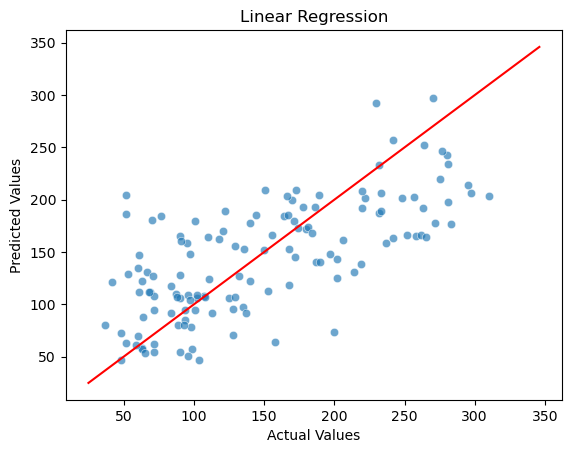

In [93]:
sns.scatterplot(x = y_test, y = y_predict, alpha=0.65)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression')
plt.show()

A model is a good fit if the points are close to the diagonal line which means a strong linear relationship between the actual and predicted values

### Residual Plot

* Residual values are plotted against the predicted values(y_predict) of the target variable
* If the linear regression is a good fit for the dataset, then the residual plot should show a random scatter of the points around zero with no discernable trend.

In [94]:
y_residual = y_test - y_predict

Text(0.5, 1.0, 'Residual Plot')

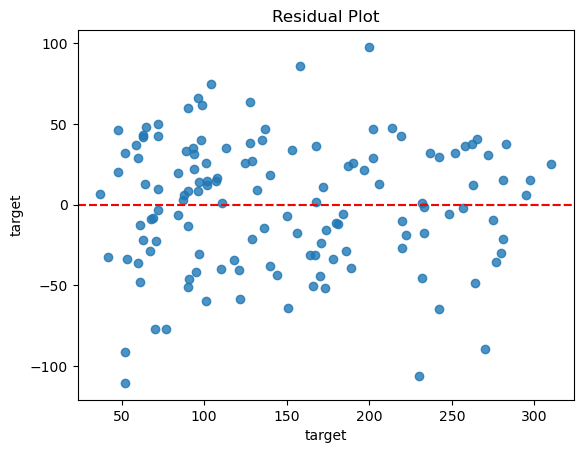

In [118]:
sns.residplot(x=y_test, y= y_residual)
plt.axhline(y= 0, color= 'r', ls= '--')
plt.title('Residual Plot')

In [129]:
#plt.scatter(y_test, y_test - y_predict)

### Coefficient Interpretation

In [97]:
final_model = LinearRegression()

In [119]:
final_model.fit(X, y)

LinearRegression()

In [120]:
final_model.coef_

array([ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
       -792.17563855,  476.73902101,  101.04326794,  177.06323767,
        751.27369956,   67.62669218])

In [100]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### Deploying model to the world

In [121]:
from joblib import dump, load

In [122]:
dump(final_model, 'final_diabetes_model.joblib')

['final_diabetes_model.joblib']

In [123]:
loaded_model = load('final_diabetes_model.joblib')

In [124]:
loaded_model.coef_

array([ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
       -792.17563855,  476.73902101,  101.04326794,  177.06323767,
        751.27369956,   67.62669218])

### Final Test: Predict the target for features

In [125]:
X.shape

(442, 10)

In [106]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [126]:
#141.0
new_data = [[0.085299, 0.050680, 0.044451, -0.005670, -0.045599, -0.034194, -0.032356, -0.002592, 0.002861, -0.025930]]

In [127]:
loaded_model.predict(new_data)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([176.8825387])